### Building your network

In [1]:
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.65))
model.add(layers.Dense(128, activation='relu' ,kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(6, activation='softmax'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)       295168    
__________

In [2]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(lr=1e-3),
metrics=['acc'])

### Data preprocessing
Using ImageDataGenerator to read images from directories

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "../dataset_splits/train"
validation_dir = "../dataset_splits/validation"

# Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir, # Target directory
    target_size=(150, 150), #Resizes all images to 150 × 150
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical') #Because you use binary_crossentropy loss, you need binary labels


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical')

Found 7245 images belonging to 6 classes.
Found 1355 images belonging to 6 classes.


### Fitting the model using a batch generator

In [4]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=230,
    epochs=80,
    validation_data=validation_generator,
    validation_steps=43)

Epoch 1/80
230/230 [==============================] - 80s 347ms/step - loss: 1.3512 - acc: 0.5309 - val_loss: 0.9872 - val_acc: 0.6952
Epoch 2/80
230/230 [==============================] - 72s 312ms/step - loss: 0.9863 - acc: 0.6924 - val_loss: 0.7947 - val_acc: 0.7734
Epoch 3/80
230/230 [==============================] - 72s 313ms/step - loss: 0.8534 - acc: 0.7513 - val_loss: 0.7974 - val_acc: 0.7668
Epoch 4/80
230/230 [==============================] - 72s 312ms/step - loss: 0.7979 - acc: 0.7822 - val_loss: 0.7412 - val_acc: 0.7993
Epoch 5/80
230/230 [==============================] - 72s 312ms/step - loss: 0.7082 - acc: 0.8157 - val_loss: 0.6380 - val_acc: 0.8487
Epoch 6/80
230/230 [==============================] - 72s 312ms/step - loss: 0.6936 - acc: 0.8222 - val_loss: 0.5958 - val_acc: 0.8598
Epoch 7/80
230/230 [==============================] - 72s 312ms/step - loss: 0.6562 - acc: 0.8389 - val_loss: 0.5477 - val_acc: 0.8834
Epoch 8/80
230/230 [==============================] - 7

230/230 [==============================] - 72s 311ms/step - loss: 0.3197 - acc: 0.9671 - val_loss: 0.4818 - val_acc: 0.9100
Epoch 62/80
230/230 [==============================] - 72s 311ms/step - loss: 0.3175 - acc: 0.9641 - val_loss: 0.4489 - val_acc: 0.9255
Epoch 63/80
230/230 [==============================] - 72s 312ms/step - loss: 0.3047 - acc: 0.9704 - val_loss: 0.4389 - val_acc: 0.9299
Epoch 64/80
230/230 [==============================] - 72s 314ms/step - loss: 0.3223 - acc: 0.9622 - val_loss: 0.4899 - val_acc: 0.9122
Epoch 65/80
230/230 [==============================] - 72s 312ms/step - loss: 0.3231 - acc: 0.9647 - val_loss: 0.4237 - val_acc: 0.9365
Epoch 66/80
230/230 [==============================] - 72s 313ms/step - loss: 0.3117 - acc: 0.9665 - val_loss: 0.3808 - val_acc: 0.9454
Epoch 67/80
230/230 [==============================] - 72s 312ms/step - loss: 0.3044 - acc: 0.9685 - val_loss: 0.4432 - val_acc: 0.9336
Epoch 68/80
230/230 [==============================] - 72s 3

### Saving the model

In [5]:
model.save('./saved model/tomato_small_1.h5')

### Displaying curves of loss and accuracy during training

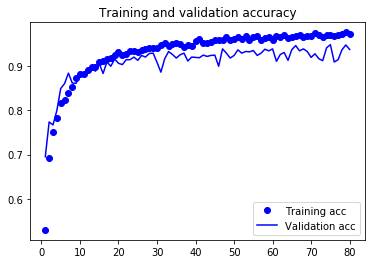

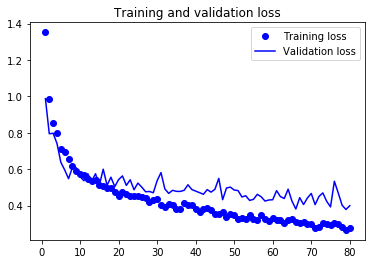

In [6]:
import matplotlib.pyplot as plt
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Train the model on all samples (Training and Validation)

In [7]:
test_dir = "../dataset_splits/test"

test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir, # Target directory
    target_size=(150, 150), #Resizes all images to 150 × 150
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical') #Because you use binary_crossentropy loss, you need binary labels


Found 448 images belonging to 6 classes.


In [8]:
score = model.evaluate_generator(test_generator, steps=40, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

In [9]:
print(score)

[0.38868151381611826, 0.95546875]
